In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [2]:
def readdata(file):
    dataframe = pd.read_csv(file)
    return dataframe
df = readdata('weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [9]:
def encodedata(dataframe):
    wind_direction_mapping = {
        "N": 0,
        "NNE": 22.5,
        "NE": 45,
        "ENE": 67.5,
        "E": 90,
        "ESE": 112.5,
        "SE": 135,
        "SSE": 157.5,
        "S": 180,
        "SSW": 202.5,
        "SW": 225,
        "WSW": 247.5,
        "W": 270,
        "WNW": 292.5,
        "NW": 315,
        "NNW": 337.5
    }
    for column in ['WindGustDir', 'WindDir9am', 'WindDir3pm']:
        dataframe[f'{column}_deg'] = dataframe[column].map(wind_direction_mapping)
        dataframe[f'{column}_sin'] = np.sin(np.deg2rad(dataframe[f'{column}_deg']))
        dataframe[f'{column}_cos'] = np.cos(np.deg2rad(dataframe[f'{column}_deg']))
        dataframe.drop(f'{column}', axis=1, inplace=True)
        dataframe.drop(f'{column}_deg', axis=1, inplace=True)

    dataframe['RainToday'] = dataframe['RainToday'].map({'Yes': 1, 'No': 0})
    dataframe['RainTomorrow'] = dataframe['RainTomorrow'].map({'Yes': 1, 'No': 0})

    dataframe['Date'] = pd.to_datetime(dataframe['Date'], format='%Y-%m-%d')
    dataframe['Day'] = dataframe['Date'].dt.dayofyear
    dataframe['Year'] = dataframe['Date'].dt.year
    dataframe.drop('Date', axis=1, inplace=True)
    baseline_year = dataframe['Year'].min()
    dataframe['Year'] = dataframe['Year'] - baseline_year

    dataframe['Location'] = dataframe['Location'].astype('category').cat.codes - 2
    # location column is clean, +2 is to handle missing vals.

    return dataframe
df = encodedata(df)
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,RainToday,RainTomorrow,WindGustDir_sin,WindGustDir_cos,WindDir9am_sin,WindDir9am_cos,WindDir3pm_sin,WindDir3pm_cos,Day,Year
0,0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,...,0.0,0.0,-1.000000,-1.836970e-16,-1.000000,-1.836970e-16,-0.923880,3.826834e-01,336,1
1,0,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,...,0.0,0.0,-0.923880,3.826834e-01,-0.382683,9.238795e-01,-0.923880,-3.826834e-01,337,1
2,0,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,...,0.0,0.0,-0.923880,-3.826834e-01,-1.000000,-1.836970e-16,-0.923880,-3.826834e-01,338,1
3,0,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,...,0.0,0.0,0.707107,7.071068e-01,0.707107,-7.071068e-01,1.000000,6.123234e-17,339,1
4,0,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,...,0.0,0.0,-1.000000,-1.836970e-16,0.923880,3.826834e-01,-0.707107,7.071068e-01,340,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,39,2.8,23.4,0.0,NaN,NaN,31.0,13.0,11.0,51.0,...,0.0,0.0,1.000000,6.123234e-17,0.707107,-7.071068e-01,0.923880,3.826834e-01,172,10
145456,39,3.6,25.3,0.0,NaN,NaN,22.0,13.0,9.0,56.0,...,0.0,0.0,-0.382683,9.238795e-01,0.707107,-7.071068e-01,0.000000,1.000000e+00,173,10
145457,39,5.4,26.9,0.0,NaN,NaN,37.0,9.0,9.0,53.0,...,0.0,0.0,0.000000,1.000000e+00,0.707107,-7.071068e-01,-0.923880,3.826834e-01,174,10
145458,39,7.8,27.0,0.0,NaN,NaN,28.0,13.0,7.0,51.0,...,0.0,0.0,0.707107,-7.071068e-01,0.382683,-9.238795e-01,0.000000,1.000000e+00,175,10


In [10]:
def handlemissing(dataframe):
    threshold_percent = 0.15
    for feature in dataframe.columns:
        missing_percent = dataframe[feature].isnull().sum() / len(dataframe)
        if missing_percent > threshold_percent:
            dataframe.drop(feature, axis=1, inplace=True)
        else:
            dataframe[feature].fillna(dataframe[feature].mean(), inplace=True)

    return dataframe

df = handlemissing(df)
df

,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,RainToday,RainTomorrow,WindGustDir_sin,WindGustDir_cos,WindDir9am_sin,WindDir9am_cos,WindDir3pm_sin,WindDir3pm_cos,Day,Year
0,0,13.4,22.900000,0.6,44.00000,20.0,24.0,71.0,22.0,1007.7,...,0.0,0.000000,-1.000000,-1.836970e-16,-1.000000,-1.836970e-16,-0.923880,3.826834e-01,336,1
1,0,7.4,25.100000,0.0,44.00000,4.0,22.0,44.0,25.0,1010.6,...,0.0,0.000000,-0.923880,3.826834e-01,-0.382683,9.238795e-01,-0.923880,-3.826834e-01,337,1
2,0,12.9,25.700000,0.0,46.00000,19.0,26.0,38.0,30.0,1007.6,...,0.0,0.000000,-0.923880,-3.826834e-01,-1.000000,-1.836970e-16,-0.923880,-3.826834e-01,338,1
3,0,9.2,28.000000,0.0,24.00000,11.0,9.0,45.0,16.0,1017.6,...,0.0,0.000000,0.707107,7.071068e-01,0.707107,-7.071068e-01,1.000000,6.123234e-17,339,1
4,0,17.5,32.300000,1.0,41.00000,7.0,20.0,82.0,33.0,1010.8,...,0.0,0.000000,-1.000000,-1.836970e-16,0.923880,3.826834e-01,-0.707107,7.071068e-01,340,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,39,2.8,23.400000,0.0,31.00000,13.0,11.0,51.0,24.0,1024.6,...,0.0,0.000000,1.000000,6.123234e-17,0.707107,-7.071068e-01,0.923880,3.826834e-01,172,10
145456,39,3.6,25.300000,0.0,22.00000,13.0,9.0,56.0,21.0,1023.5,...,0.0,0.000000,-0.382683,9.238795e-01,0.707107,-7.071068e-01,0.000000,1.000000e+00,173,10
145457,39,5.4,26.900000,0.0,37.00000,9.0,9.0,53.0,24.0,1021.0,...,0.0,0.000000,0.000000,1.000000e+00,0.707107,-7.071068e-01,-0.923880,3.826834e-01,174,10
145458,39,7.8,27.000000,0.0,28.00000,13.0,7.0,51.0,24.0,1019.4,...,0.0,0.000000,0.707107,-7.071068e-01,0.382683,-9.238795e-01,0.000000,1.000000e+00,175,10


In [11]:
def scaledata(dataframe):
    scaler = StandardScaler()
    dataframe = pd.DataFrame(scaler.fit_transform(dataframe))
    return dataframe

df = scaledata(df)
df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-1.531666,0.189447,-4.533631e-02,-0.210072,0.302234,0.672222,0.612323,0.112395,-1.442965,-1.478788,...,-0.543698,-0.543691,-1.429397e+00,0.071444,-1.519914,-0.020005,-1.291016,0.622891,1.495149,-1.879575
1,-1.531666,-0.753101,2.650431e-01,-0.281650,0.302234,-1.133438,0.382874,-1.319609,-1.296417,-1.047782,...,-0.543698,-0.543691,-1.318404e+00,0.638055,-0.596406,1.313329,-1.291016,-0.484820,1.504693,-1.879575
2,-1.531666,0.110901,3.496920e-01,-0.281650,0.454694,0.559368,0.841771,-1.637832,-1.052171,-1.493650,...,-0.543698,-0.543691,-1.318404e+00,-0.495166,-1.519914,-0.020005,-1.291016,-0.484820,1.514237,-1.879575
3,-1.531666,-0.470337,6.741796e-01,-0.281650,-1.222364,-0.343462,-1.108541,-1.266572,-1.736061,-0.007422,...,-0.543698,-0.543691,1.059787e+00,1.118404,1.033923,-1.040494,1.454699,0.069035,1.523781,-1.879575
4,-1.531666,0.833521,1.280830e+00,-0.162353,0.073544,-0.794877,0.153426,0.695804,-0.905623,-1.018057,...,-0.543698,-0.543691,-1.429397e+00,0.071444,1.358215,0.532280,-0.981643,1.092427,1.533324,-1.879575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,1.209285,-1.475720,2.520446e-02,-0.281650,-0.688755,-0.117754,-0.879093,-0.948349,-1.345267,1.032937,...,-0.543698,-0.543691,1.486863e+00,0.071444,1.033923,-1.040494,1.346062,0.622891,-0.070026,1.666978
145456,1.209285,-1.350047,2.932594e-01,-0.281650,-1.374824,-0.117754,-1.108541,-0.683163,-1.491815,0.869452,...,-0.543698,-0.543691,-5.292695e-01,1.439363,1.033923,-1.040494,0.027523,1.516329,-0.060483,1.666978
145457,1.209285,-1.067283,5.189899e-01,-0.281650,-0.231375,-0.569169,-1.108541,-0.842274,-1.345267,0.497895,...,-0.543698,-0.543691,2.873279e-02,1.552069,1.033923,-1.040494,-1.291016,0.622891,-0.050939,1.666978
145458,1.209285,-0.690264,5.330980e-01,-0.281650,-0.917445,-0.117754,-1.337990,-0.948349,-1.345267,0.260099,...,-0.543698,-0.543691,1.059787e+00,-0.975515,0.548585,-1.353338,0.027523,1.516329,-0.041395,1.666978


In [12]:
df = df.to_numpy()
df

array([[-1.53166617e+00,  1.89446615e-01, -4.53363105e-02, ...,
         6.22890791e-01,  1.49514941e+00, -1.87957524e+00],
       [-1.53166617e+00, -7.53100728e-01,  2.65043084e-01, ...,
        -4.84819887e-01,  1.50469316e+00, -1.87957524e+00],
       [-1.53166617e+00,  1.10901003e-01,  3.49692009e-01, ...,
        -4.84819887e-01,  1.51423692e+00, -1.87957524e+00],
       ...,
       [ 1.20928479e+00, -1.06728318e+00,  5.18989861e-01, ...,
         6.22890791e-01, -5.09388897e-02,  1.66697818e+00],
       [ 1.20928479e+00, -6.90264238e-01,  5.33098015e-01, ...,
         1.51632920e+00, -4.13951348e-02,  1.66697818e+00],
       [ 1.20928479e+00,  4.25083451e-01, -5.01222327e-16, ...,
        -4.84819887e-01, -3.18513799e-02,  1.66697818e+00]])

In [13]:
def clustering(data, cluster_count, tolerance=0.001):
    centroids = data[np.random.choice(len(data), cluster_count, replace=False)]

    while True:
        distances_squared = np.linalg.norm(data[:, np.newaxis, :] - centroids, axis=2) ** 2
        cluster_updating = np.argmin(distances_squared, axis=1)

        centroid_updating = np.array([data[cluster_updating == i].mean(axis=0) for i in range(cluster_count)])

        if np.linalg.norm(centroid_updating - centroids) < tolerance:
            cluster_set = cluster_updating
            break

        centroids = centroid_updating

    return cluster_set, centroids

In [14]:
def calculate_inertia(data, centroids, cluster_set):
    return np.sum((data - centroids[cluster_set]) ** 2)

In [15]:
def find_optimal_cluster(data, cluster_count, iterations=10):
    optimal_inertia = float('inf')
    optimal_result = None

    for _ in range(iterations):
        cluster_set, centroids = clustering(data, cluster_count)

        inertia = calculate_inertia(data, centroids, cluster_set)
        if optimal_inertia > inertia:
            inertia, optimal_inertia = optimal_inertia, inertia
            optimal_result = (cluster_set, centroids)

    return optimal_result

In [18]:
def elbowing(data, k_count=10):
    inertiae = []
    for cluster_count in range(1, k_count + 1):
        cluster_set, centroids = find_optimal_cluster(data, cluster_count)
        inertiae = np.append(inertiae, calculate_inertia(data, centroids, cluster_set))

    k = 3
    return k, inertiae

cluster_count, inertiae = elbowing(df)
print(cluster_count)
print(inertiae)

3
[3345580.         2880141.28674085 2636035.26106934 2501561.71031046
 2393894.7675975  2312171.47638431 2247709.70153846 2187220.68042027
 2135350.59206135 2086836.97436909]


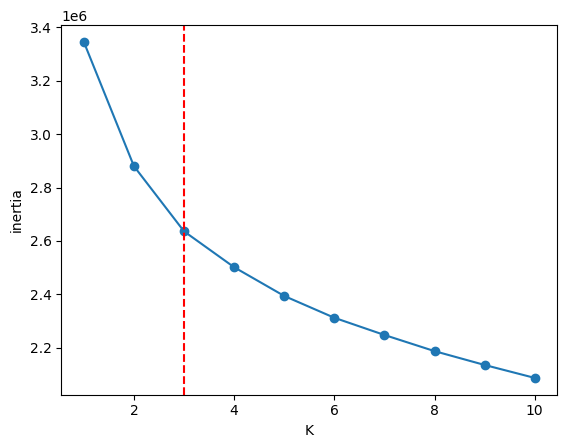

In [20]:
def elbow_graphing(inertiae):
    plt.plot(np.arange(len(inertiae)) + 1, inertiae, marker='o')
    plt.axvline(x=3, color='red', linestyle='--')  # on testing, k = 3 looks nice
    plt.xlabel('K')
    plt.ylabel('inertia')
    plt.show()
elbow_graphing(inertiae)

In [21]:
cluster_set, centroids = find_optimal_cluster(df, cluster_count)
print(cluster_set)
print(centroids)

[0 1 1 ... 2 1 1]
[[ 0.06138173 -0.12630274 -0.61758843  0.61391689  0.81250099  0.58532045
   0.58959345  0.42163863  0.65315803 -0.67857695 -0.52519311 -0.3633141
  -0.66137474  0.88057742  0.81574913 -0.60504417  0.05107362 -0.59692745
   0.1772111  -0.58313541  0.00494984  0.16598772 -0.07687077]
 [-0.03545069  0.78856505  0.96926192 -0.18506896  0.09030722  0.08687764
   0.11741422 -0.57001493 -0.46651113 -0.3539556  -0.44175546  0.9197561
   0.95284066 -0.3105719  -0.21902559  0.37750248  0.05169548  0.42492973
  -0.01925837  0.31865409  0.10480055 -0.19781582  0.05757571]
 [-0.00203585 -0.70604777 -0.58748577 -0.18858238 -0.58230221 -0.44114351
  -0.47404141  0.31005942  0.06694829  0.76276029  0.75689276 -0.69253604
  -0.54463743 -0.22571775 -0.2772657  -0.00778383 -0.08227603 -0.05977606
  -0.08834156  0.03733716 -0.10701369  0.09567833 -0.0105307 ]]


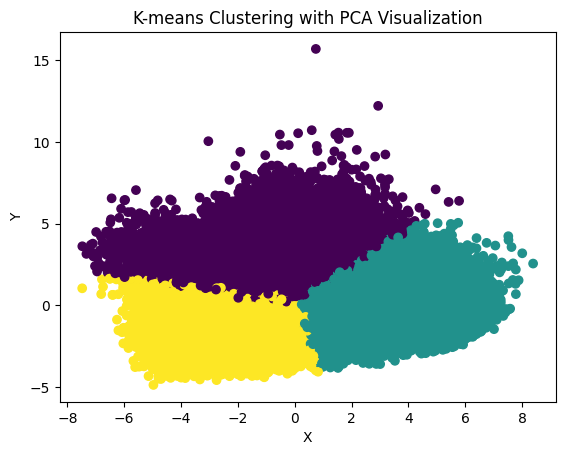

In [22]:
def PCAdecomposition(data, cluster_set):
    pca = PCA()
    transformed_data = pca.fit_transform(data)
    plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=cluster_set, cmap='viridis')
    plt.title('K-means Clustering with PCA Visualization')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
PCAdecomposition(df, cluster_set)